In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca
import pandas as pd
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.decomposition as decomposition

In [10]:
df = pd.read_csv("data/scab_0.csv", sep=';')
df

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 15:56:30,0.027608,0.039203,1.290480,0.054711,68.6194,24.3670,241.062,32.0362,0.0,0.0
1,2020-03-09 15:56:31,0.027166,0.039940,1.285650,0.382638,68.5923,24.3660,238.709,32.9649,0.0,0.0
2,2020-03-09 15:56:32,0.027718,0.040167,1.155880,0.054711,68.5207,24.3666,226.485,32.0362,0.0,0.0
3,2020-03-09 15:56:33,0.028045,0.038026,0.971268,0.382638,68.5425,24.3634,220.378,32.9649,0.0,0.0
4,2020-03-09 15:56:34,0.027644,0.038580,1.072460,-0.273216,68.6569,24.3639,233.922,32.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1120,2020-03-09 16:16:25,0.027446,0.039528,0.678398,0.382638,67.7144,24.3205,253.086,32.0000,0.0,0.0
1121,2020-03-09 16:16:26,0.028101,0.038690,0.858077,0.382638,67.7998,24.3226,234.633,32.0384,0.0,0.0
1122,2020-03-09 16:16:27,0.028037,0.039878,0.567099,0.054711,67.6625,24.3225,224.864,32.9627,0.0,0.0
1123,2020-03-09 16:16:28,0.027901,0.042154,0.652006,-0.273216,67.7782,24.3185,227.674,32.0000,0.0,0.0


In [14]:
X0 = df.values[:,1:-2]
X0 = np.array(X0, dtype='d')
X0 = preprocessing.scale(X0)
print(X0.shape, X0.dtype)

(1125, 8) float64


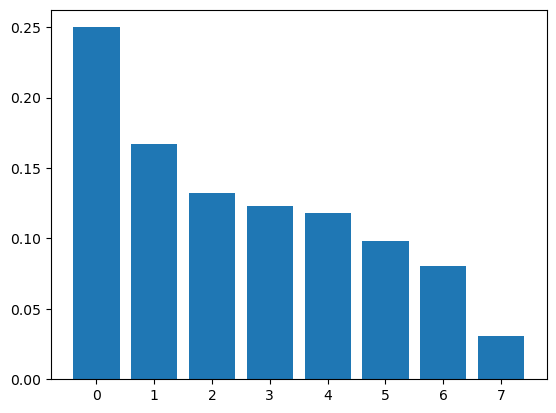

In [15]:
pca_sk = decomposition.PCA()
pca_sk = pca_sk.fit(X0)
U0 = pca_sk.transform(X0)
plt.bar(range(X0.shape[1]), pca_sk.explained_variance_ratio_)
plt.show()

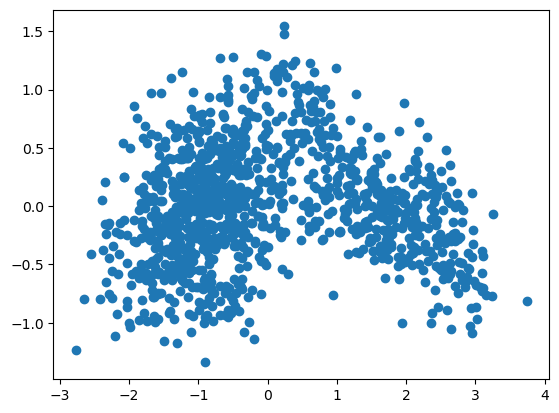

In [23]:
plt.scatter(U0[:,0], U0[:,7])
plt.show()

In [16]:
sk_cs = pca_sk.components_
sk_c0 = pca_sk.mean_
sk_a1 = sk_cs[0,:]
sk_a2 = sk_cs[1,:]

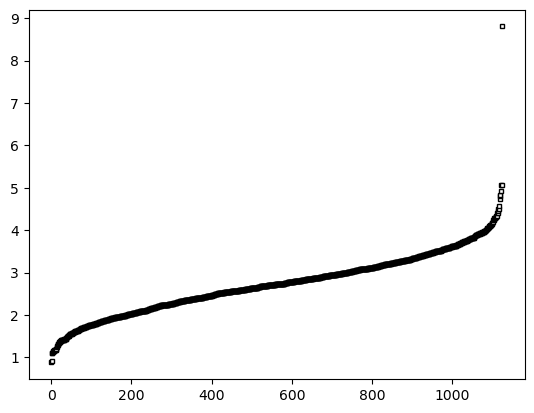

[-2.23584114e-15  1.41476954e-15  6.64752204e-16  3.15796771e-18
  1.81898940e-15  4.82537467e-14 -1.80793652e-15 -1.28845083e-15]


In [24]:
c0 = pca.location(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=3, color='w', markeredgecolor='k')
plt.show()
print(c0)

0.9991111111111111


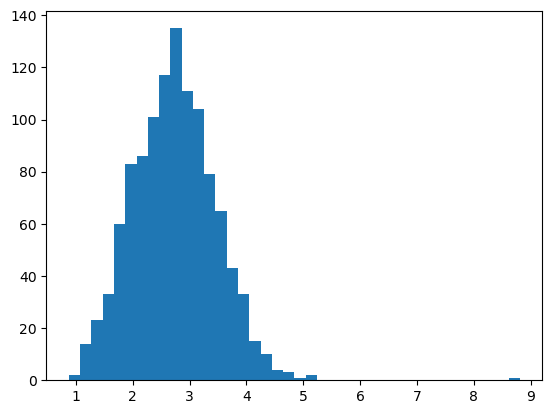

[-6.90005194e-03 -7.63020244e-04  5.91654646e-04  9.92707483e-04
 -1.63228984e-03 -1.29246223e-03 -9.90231400e-06 -5.38040179e-04]


In [25]:
N = len(X0)
alpha = (N - 1) / N
print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
c = pca.robust_location(X0, wma)
plt.hist(pca.distance_center(X0, c), bins=40)
# plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=3)
plt.show()
print(c)

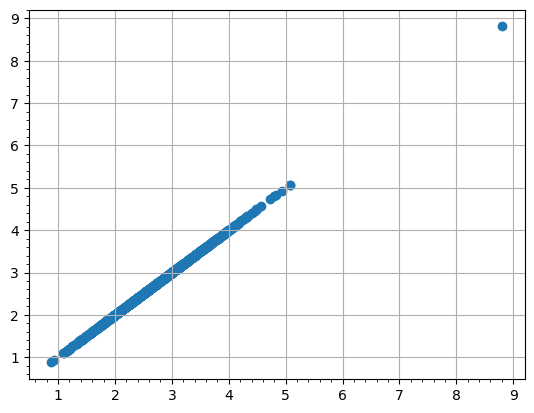

In [26]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [27]:
X1 = X0 - c
X1_0 = X0 - c0

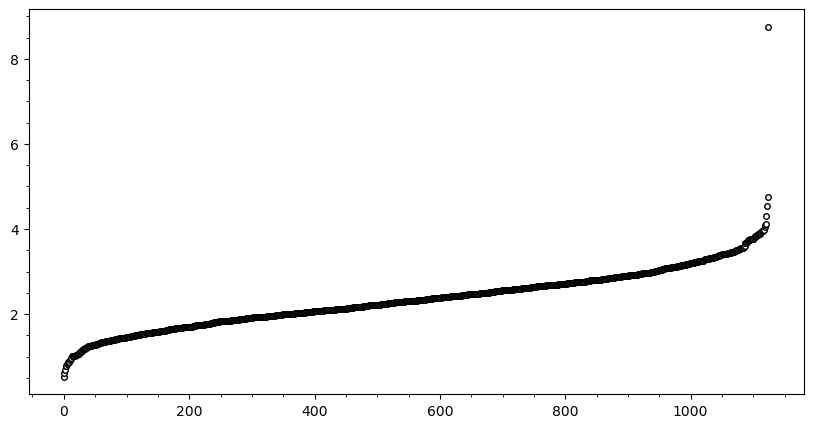

1.999831674359606 [ 0.16267686  0.4097088  -0.03813018  0.00156558 -0.58246702 -0.64250658
 -0.02608286 -0.22683856]


In [28]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.figure(figsize=(10,5))
# plt.hist(pca.distance_line(X1_0, a1_0), bins=50, rwidth=0.9)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, color='w', markeredgecolor='k')
plt.minorticks_on()
plt.show()
print(L1_0, a1_0)

0.9911111111111112


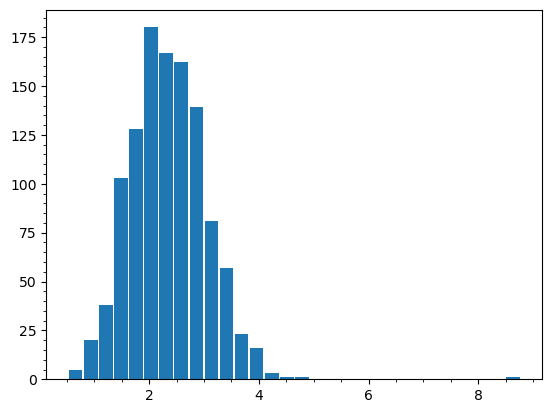

1.9832501047203845 [-0.14902865 -0.40753283  0.03841414  0.00881168  0.58632558  0.64529507
  0.03560164  0.22068818]


In [29]:
N = len(X0)
alpha = (N - 10) / N
print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
a1, L1 = pca.find_robust_pc(X1, wma)

plt.hist(pca.distance_line(X1, a1), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.minorticks_on()
plt.show()
print(L1, a1)
U1 = pca.project_line(X1, a1)
U1_0 = pca.project_line(X1_0, a1_0)

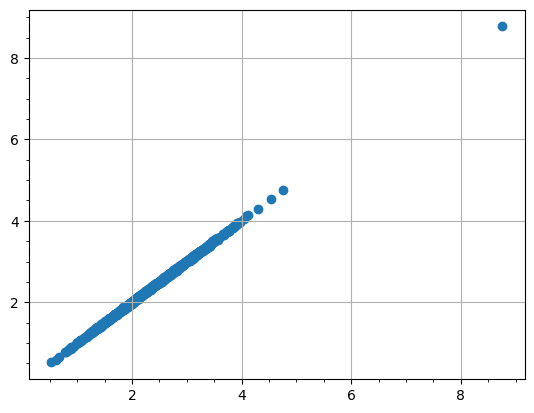

In [30]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [31]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

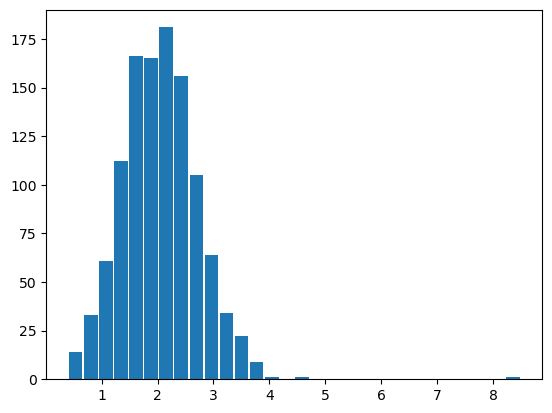

1.3363377371381733 [-0.10055222  0.02240906  0.70330909  0.02216606 -0.03218787 -0.03646317
  0.69781761 -0.07026407]


In [32]:
a2_0, L2_0 = pca.find_pc(X2)
plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

0.9911111111111112


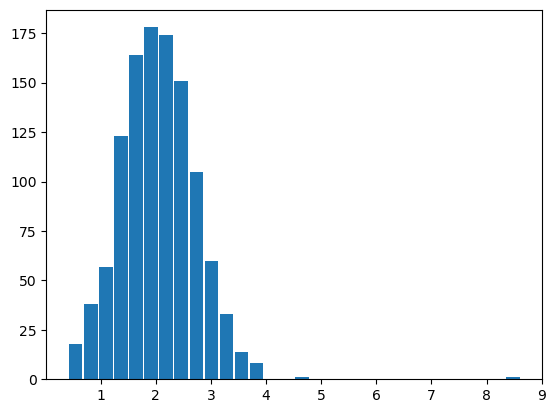

1.3280461928342784 [-0.03278316 -0.0071196   0.70078371  0.06099877 -0.04168773 -0.04169842
  0.7063293  -0.04096607]


In [33]:
N = len(X0)
alpha = (N - 10) / N
print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
a2, L2 = pca.find_robust_pc(X2, wma)
plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

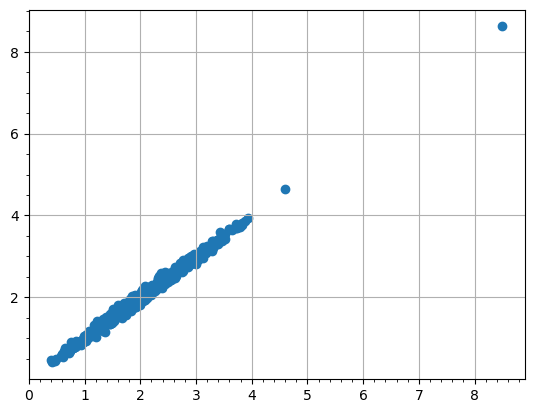

In [34]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

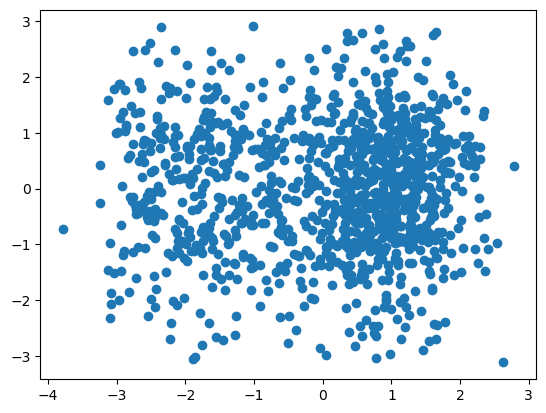

In [35]:
plt.scatter(U1,U2)
plt.show()

In [36]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [40]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(0.99, 0.01))
S = pca.robust_scatter_matrix(X0, wma)
print(S)

K: 99
[[ 0.90391627  0.05712031  0.05846932 -0.03713363 -0.05199423  0.21316997
  -0.01851421 -0.03867949]
 [ 0.05712031  1.00410704  0.05614965  0.0065278   0.02724855  0.33518419
  -0.03738715  0.04468633]
 [ 0.05846932  0.05614965  0.98594579  0.03784721  0.01850762  0.01106112
  -0.32990152  0.01005271]
 [-0.03713363  0.0065278   0.03784721  0.87466488  0.01502283 -0.01719411
  -0.05120703 -0.00215217]
 [-0.05199423  0.02724855  0.01850762  0.01502283  1.85021817 -1.38855985
  -0.01253336  0.30904895]
 [ 0.21316997  0.33518419  0.01106112 -0.01719411 -1.38855985  2.12245373
  -0.02246948 -0.45566689]
 [-0.01851421 -0.03738715 -0.32990152 -0.05120703 -0.01253336 -0.02246948
   0.98246256  0.00715539]
 [-0.03867949  0.04468633  0.01005271 -0.00215217  0.30904895 -0.45566689
   0.00715539  0.98238059]]


In [41]:
L, A = np.linalg.eig(S)
print(L)
print(A)
np.dot(A[0], A[1])

[3.53442879 1.35653198 0.43485037 1.10672505 0.65076651 0.81997138
 0.92190548 0.88096947]
[[-0.07697836 -0.15413436  0.16267687 -0.25919502 -0.10167125  0.62697663
   0.67988417  0.1048422 ]
 [-0.08795477 -0.2863078   0.4097088  -0.78479016  0.01997496 -0.21914542
  -0.24677652 -0.13119659]
 [-0.0020173  -0.66357037 -0.0381302   0.21159996  0.70358255 -0.02899324
   0.05229648  0.12181095]
 [ 0.00888757 -0.11401205  0.00156558  0.11191972  0.02200638  0.63563401
  -0.47494239 -0.58677819]
 [ 0.64073792 -0.13274176 -0.58246702 -0.31282741 -0.02875957 -0.09967531
   0.19534324 -0.29288987]
 [-0.72980124 -0.07276305 -0.64250658 -0.21188645 -0.03265443 -0.01776889
  -0.00627291 -0.05444017]
 [ 0.00579026  0.6450458  -0.02608288 -0.27498145  0.6979367   0.13674519
   0.03096571 -0.02852217]
 [ 0.20752538 -0.04412639 -0.22683856 -0.20310129 -0.06886373  0.35363009
  -0.45759858  0.72324774]]


-8.604228440844963e-16

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


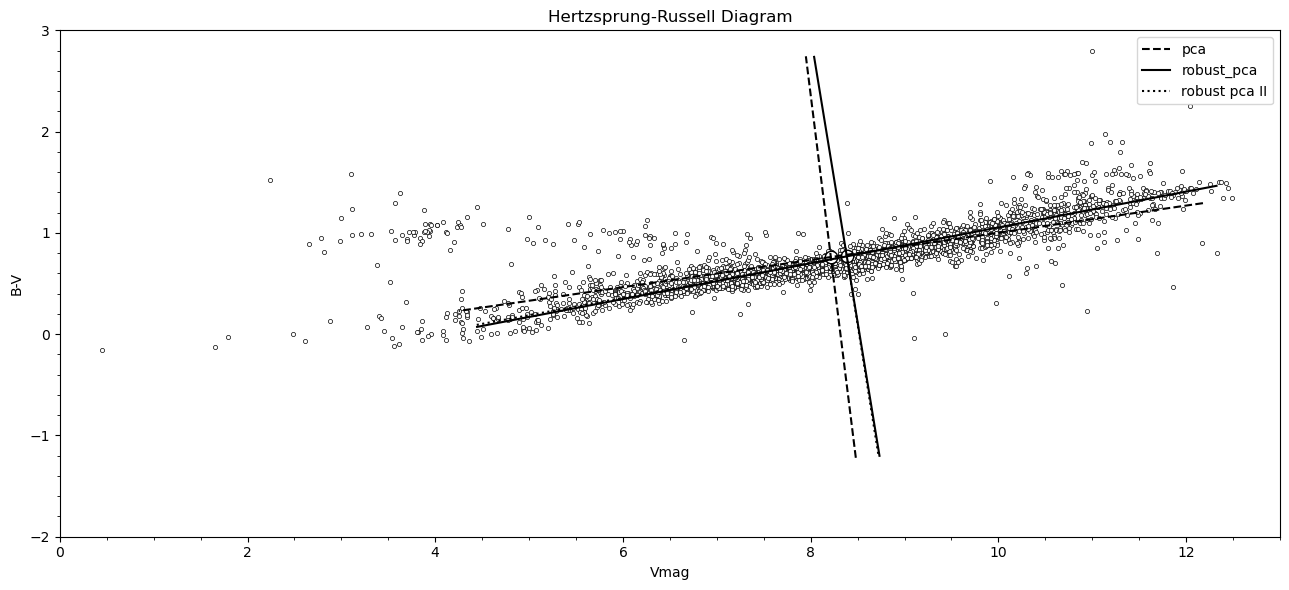

In [24]:
plt.figure(figsize=(13,6))
plt.scatter(Vmag, B_V, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], c[[1]], s=81, c='w', edgecolors='k')
plt.plot([sk_c0[0]-4*sk_a1[0], sk_c0[0]+4*sk_a1[0]], [sk_c0[1]-4*sk_a1[1], sk_c0[1]+4*sk_a1[1]], 
         label='pca', linestyle='--', c='k')
plt.plot([sk_c0[0]-2*sk_a2[0], sk_c0[0]+2*sk_a2[0]], [sk_c0[1]-2*sk_a2[1], sk_c0[1]+2*sk_a2[1]],
        linestyle='--', c='k')
plt.plot([c[0]-4*a1[0], c[0]+4*a1[0]], [c[1]-4*a1[1], c[1]+4*a1[1]], 
         label='robust_pca', linestyle='-', c='k')
plt.plot([c[0]-2*a2[0], c[0]+2*a2[0]], [c[1]-2*a2[1], c[1]+2*a2[1]],
        linestyle='-', c='k')
plt.plot([c[0]+4*A[0,0], c[0], c[0]+2*A[0,1]], [c[1]+4*A[1,0], c[1], c[1]+2*A[1,1]], 
         c='k', linestyle=':', label='robust pca II')
plt.legend()
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.xlim(0,13)
plt.ylim(-2,3)
plt.tight_layout()
plt.savefig('fig/robust_pca_HIP_star_1.eps')
plt.show()